# Internal sensor correction (UAS)

Load raw hyperspectral scenes and apply relevant sensor corrections. In this case this is for the Rikola camera.

In [2]:
import os, glob
import hylite

In [3]:
from hylite import io as io
from hylite.sensors import Rikola # Import sensor used to capture data here

## Select images to process
1) Set path to "CalibData" folder containing radiance Rikola files and define list of images

In [1]:
path = "/net/fwghus/projects/fernerkundung/data/SPAIN/2016/Outcrops/Corta Atalaya/Sep_Oct_2016/Photogrammetry + Rikola UAV/flight-4-1/CalibData/"

## Apply sensor corrections
2 a) Correct each file in folder for lens distortion and align bands with affine / deepflow matching workflow. 

In [ ]:
Rikola.correct_folder(path, 
                      multi=True, # Set True to activate multithreading
                      nthreads=4, # Set number of threads 
                      crop=False, # If you want to proceed to a hypercloud, set crop = False to maintain original size of image
                      overwrite=False) # Set True to overwrite previously corrected files

2 b) If you want to do some older folder reprocessing, where file patterns may not fit and correct_folder fails, you can alternatively correct the data file by file

In [ ]:
os.chdir(path)
outpath = "/net/fwghus/projects/fernerkundung/work/thiele67/Hylite Paper/Corte Atalaya/Hypercloud/input_RIKOLA/2016-1/"
for file in glob.glob('*.dat'):
    image = io.loadWithGDAL(path + file)
    Rikola.correct_image(image, lens=True, align=True, crop=False)
    io.saveWithGDAL(outpath+file[:-4] + '_CORRECTED.dat', image)

## Load example and plot preview

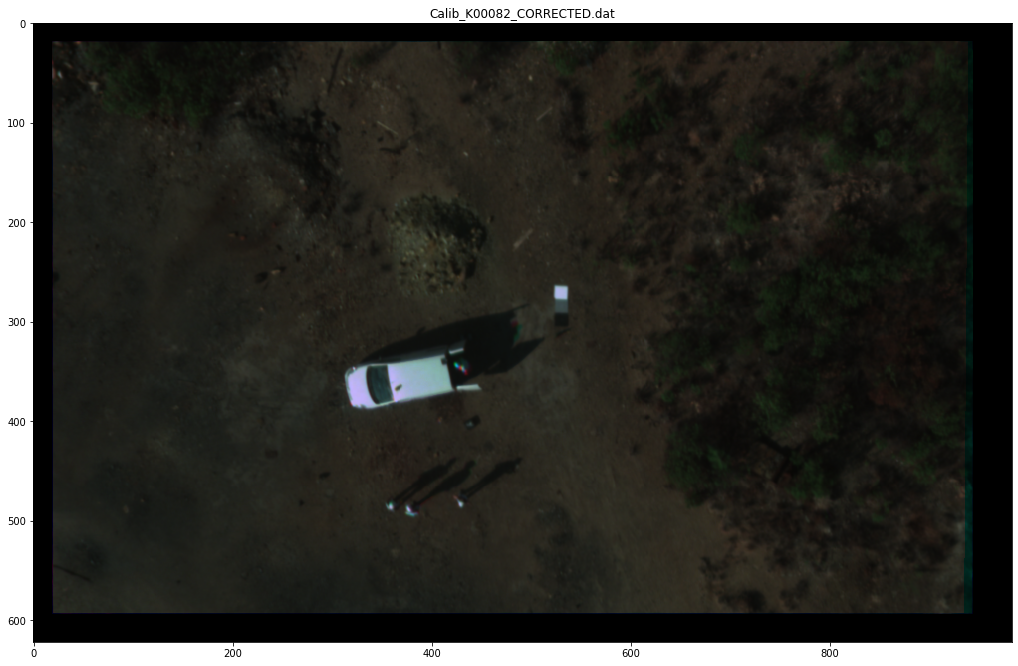

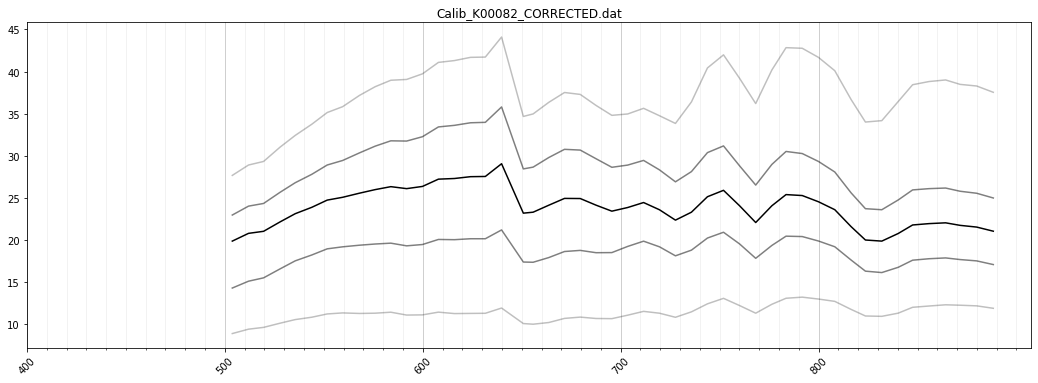

In [4]:
# Load image
paths = path + 'Calib_K00082_CORRECTED.dat'
image = io.loadWithGDAL(paths)

# Plot image
fig,ax = image.quick_plot(hylite.RGB)
ax.set_title(os.path.basename(paths))
fig.show()

#Plot spectra
fig, ax = image.plot_spectra()
ax.set_title(os.path.basename(paths))
fig.show()